# Initial model experiments

Imports and constants

In [13]:
import os
import pickle
from pathlib import Path

import numpy as np
import pandas as pd

from skimage import io
import cv2

import tensorflow as tf

In [92]:
DATA_IMAGES_PATH = os.path.join(os.path.dirname(os.getcwd()), 'data', 'interim')
PROCESSED_DATA_PATH = os.path.join(os.path.dirname(os.getcwd()), 'data', 'processed', 'data.npy')
PROCESSED_LABELS_PATH = os.path.join(os.path.dirname(os.getcwd()), 'data', 'processed', 'labels.npy')

IMG_WIDTH = 128
IMG_HEIGHT = 128

Let's parse all the filepaths and store them in a list

In [81]:
img_path_list = [os.path.join(DATA_IMAGES_PATH, name) for name in os.listdir(DATA_IMAGES_PATH)]

In [82]:
len(img_path_list)

4500

In [83]:
img_path_list[5]

'E:\\Projekty\\Github-repositories\\painting-style-classification\\data\\interim\\1004_Post-Impressionism.jpg'

In [84]:
for index, value in enumerate(img_path_list):
    print (str.split(value, os.path.sep)[-1]
           .upper()
           .replace('.JPG', ''))
    if index >5:
        break

0_IMPRESSIONISM
1000_POST-IMPRESSIONISM
1001_POST-IMPRESSIONISM
1002_POST-IMPRESSIONISM
1003_POST-IMPRESSIONISM
1004_POST-IMPRESSIONISM
1005_POST-IMPRESSIONISM


In [91]:
def prepare_img_data(path_list, img_width=IMG_WIDTH, img_height=IMG_HEIGHT):
    X = []
    y = []
#     print("Currently preparing a class")
    for index, value in enumerate(path_list):
        try:
            X.append(np.array(cv2.resize((cv2.imread(value, cv2.IMREAD_GRAYSCALE)), 
                                         (img_width, img_height))))
            y.append(str.split(value, os.path.sep)[-1]
                     .upper()
                     .replace('.JPG', ''))
        except Exception as e:
            print(str(e))
            print("Corrupted image, skipping the image")
        if index%1000 == 0:
            print('Just did one k')
    return X, y

In [86]:
data, labels = prepare_img_data(img_path_list)

KeyboardInterrupt: 

In [87]:
len(labels)

1

In [88]:
labels

['0_IMPRESSIONISM.JPG']

In [76]:
data[0]

array([[201, 116, 145, ..., 131, 161, 107],
       [137, 102,  89, ..., 178, 148, 125],
       [151, 117, 102, ..., 164, 170, 151],
       ...,
       [167, 193, 177, ...,  70,  71,  80],
       [131, 137, 147, ...,  76, 114,  80],
       [170, 200, 171, ...,  73, 126, 127]], dtype=uint8)

Now, let's see what the image looks like

0_IMPRESSIONISM.JPG


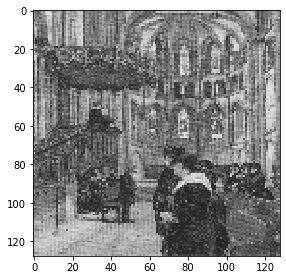

In [90]:
print(labels[0])
io.imshow(data[0])

Since we'll focus on building a proper pipeline later on, we can save the data as a numpy arrays.

In [ ]:
np.save(PROCESSED_DATA_PATH, X)
np.save(PROCESSED_LABELS_PATH, y)